## Modelado de datos con Redes Neuronales 
#### Topic: Overfitting, Underfitting

* when training neural network using tensorflow one will have to look at the loss fuction of the training data and so called validation data and its important to understand what is happening
* there will also be option called regularization
* now we will try to understand what are those two things and how to use them

## Polynomial Regression:
#### In case of linear regression:

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$h_{\theta}(x)=\theta_0+\theta_1x +\theta_2x^2 $

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [7]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.84816808 -1.26208262]]
Intercept:  [109.63636048]


Text(0, 0.5, 'Emission')

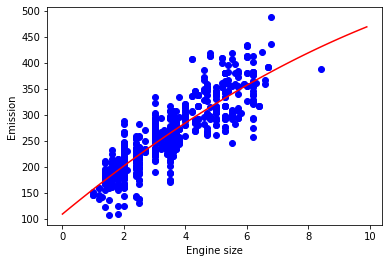

In [8]:
import matplotlib.pyplot as plt
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In the above situation (a bit exagerated) we can have three cases:

#### a) underfit
* if we fit the data with a polynomial too simple for the curent situation
$$h_{\theta}(x)=\theta_0+\theta_1x_1$$
(straight line)

<img src="imgs/underfit.png" width="200" />

* this is called underfit

***high bias ***


#### b) just right
* if we fit the data with a right polynomial 
$$h_{\theta}(x)=\theta_0+\theta_1x_1 +\theta_2x_2^2 $$

<img src="imgs/just_right.png" width="200" />

***just right ***

#### c) overfit
* * if we fit the data with a polynomial too complex for the curent situation
$$h_{\theta}(x)=\theta_0+\theta_1x_1 +\theta_2 x_2^2 +\theta_3x_3^3 +\theta_4x_4^4 $$

<img src="imgs/overfit.png" width="200" />
* overfitting


***high variance***

## In case of logistic regression:

#### a) logistic underfit
* if we fit the data with a polynomial too simple for the curent situation
$$h_{\theta}(x)=g(\theta_0+\theta_1 x_1)$$
where g is the sigmoid function

<img src="imgs/logistic_underfit.png" width="200" />

* this is called underfit

***high bias ***

#### b) logistic just right
* if we fit the data with a right polynomial 
$$h_{\theta}(x)=g(\theta_0+\theta_1 x_1 + \theta_2 x_2^2 + \theta_3x_3^3 + \theta_4x_4^4 + \theta_5x_1x_2)$$
where g is the sigmoid function

<img src="imgs/logistic_just_right.png" width="200" />

***just right ***

#### c) logistic overfit
* * if we fit the data with a polynomial too complex for the curent situation
$$h_{\theta}(x)=g(\theta_0+\theta_1x_1 +\theta_2 x_2^2 +\theta_3x_1^2x_2 + \theta_4x_1^2x_2^2 + \theta_4x_1^2x_2^3  + \theta_5x_1^3x_2  ... )$$

<img src="imgs/logistic_overfit.png" width="200" />
* overfitting


***high variance***

### How to deal with overfitting

1. Reduce number of features (eg in the case of the CO2 emission of the car or price houses)
* Manually select which features to keep
* Model selection algorithm (later).
  * PCA - Principal Component Analysis
  * Correlation Matrix
  * Autoencoders

2. Regularization.
* Keep all the features, but reduce magnitude/values of parameters .

### But how to detect overfitting
* answer: cross-validation or validation
* but how can this help?

So far we have been splitting our dataset into 
* training set (X_train,y_train)
* testing set (X_test,y_test)

using sklearn package:

In [4]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size = 0.2)

### data sets during machine learning process:
* training set - was to traing the algorithm
* testing set - was to check how well we train the model

but we need one more set called 
* cross-validation or validation set - to validate the training

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

1) after the first command (100 total elements):
* train set contains 80% of the data (80 elements)
* test set contains 20% of the data (20 element)

1) after the second command:
* test set still contains 20% of the data (20 elements)
* validation set contains 20% of the 80% of the data (20 elements)
* training set contains 80% of the 80% of the data (60 elements)

*** *we still need the test set because the algorithm can see the validation set during training***

## Lets look at the data that we used to test the linear regression model (you used this data to test your gradient descent algorithm)


## 1 using only training data
* we choose a polynomial and look at loss function of the training set
* during the training the loss function must go down

## 2 using training data and validation data

* good model must generalize 
* we split the data lets say 50/50 
* we choose a polynomial and look at loss function of the training set
* during the training the loss function must go down

* at the same model that is being trained using training data should also be fitting well the validation data (its the same set of data just splitted)

  * if the polynomial is just right it will fit well  
    the training data and the validation data, for both sets the loss function should go down
    
  * if the polynomial is too complicated it will fit well only 
    the training data so during the training the loss function will go     down (complicated polynomial is trying to minimize to the training points) but the validation points are different points so the same complicated polynomial will not be good for different points anymore

# 2. Regularization